## **Handling Images**
Image classification is a fascinating field in machine learning that enables computers to identify patterns and objects in images. Before applying machine learning algorithms to images, we typically need to preprocess the raw images and convert them into usable features. The widely used Open Source Computer Vision Library (OpenCV) is a powerful tool for handling images, offering extensive documentation and popularity among developers.

In [1]:
# #Uncomment
##Use the following command to install OpenCV:
# !pip install opencv-python

In [2]:
##Uncomment to see th eversion of OpenCV
# import cv2
# cv2.__version__



## Loading Images
Let's load an image for preprocessing. We use use OpenCV’s `imread`:

In [3]:
# Load cv2 library
import cv2

#load numpy
import numpy as np

#import pyplot from matplotlib
from matplotlib import pyplot as plt

In [4]:
# Load image as grayscale
image = cv2.imread('messi.jpg', cv2.IMREAD_GRAYSCALE)


If we want to view the image, we can use the Python plotting library Matplotlib:

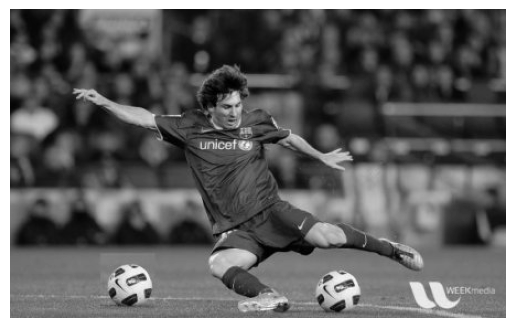

In [5]:
# Show image

plt.imshow(image, cmap="gray")

 # Turn off axis labels for a cleaner display
plt.axis("off")
plt.show()

Fundamentally, images are data and when we use imread we convert that data into a data type we are very familiar with—a NumPy array:

In [6]:
# Show data type

type(image)

numpy.ndarray

We have transformed the image into a matrix whose elements correspond to individual pixels. We can even take a look at the actual values of the matrix:

In [7]:
# Show image data
image

array([[ 42,  47,  50, ...,  55,  53,  53],
       [ 45,  49,  53, ...,  59,  58,  58],
       [ 48,  54,  59, ...,  65,  64,  63],
       ...,
       [114, 107, 102, ..., 106, 110, 110],
       [118, 120, 111, ..., 111, 117, 117],
       [112, 120, 109, ..., 110, 105, 105]], dtype=uint8)

Let's see the resolution of the image, the exact dimensions of our matrix:

In [8]:
# Show dimensions
image.shape

(280, 450)

What does each element in the matrix actually represent? In grayscale images, the value of an individual element is the pixel intensity. Intensity values range from black (0) to white (255). For example, what is the intensity of the top-rightmost pixel in our image?

In [9]:
# Show first pixel
image[0,449]

53

In the matrix, each element contains three values corresponding to blue, green, red values (BGR):

In [10]:
# Load image in color
image_bgr = cv2.imread('messi.jpg', cv2.IMREAD_COLOR)

# Show first pixel
image_bgr[0,0]

array([37, 40, 48], dtype=uint8)

One small caveat: by default OpenCV uses BGR (historical reasons), but many image applications— including Matplotlib—use red, green, blue (RGB), meaning the red and the blue values are swapped. To properly display OpenCV color images in Matplotlib, we need to first convert the color to [RGB](http://bit.ly/2FxZjKZ) (apologies to hardcopy readers):

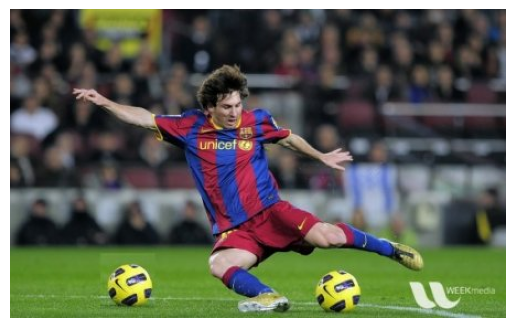

In [11]:
#Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

 #Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

## Saving Images
In this part, your task is to save an image for preprocessing. You can use OpenCV’s imwrite.

Using OpenCV's `imwrite` function allows us to save images to a specified file path. The image format is determined by the extension of the filename (e.g., .*jpg*, .*png*). It is important to note that `imwrite` will overwrite existing files without displaying an error message or requesting confirmation, so caution should be exercised when using this function.

In [12]:
# Load image as grayscale
image = cv2.imread('messi.jpg', cv2.IMREAD_GRAYSCALE)

# Save image
cv2.imwrite('messi_new.jpg', image)

True

## Resizing Images
Resizing images is a common preprocessing task in machine learning to ensure consistent dimensions and reduce memory usage. However, it can result in information loss as the image matrix is reduced in size. Common image sizes for machine learning include 32x32, 64x64, 96x96, and 256x256.

In this task we want to resize an image for further preprocessing, we can use `resize` to change the size of an image:

In [13]:
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))

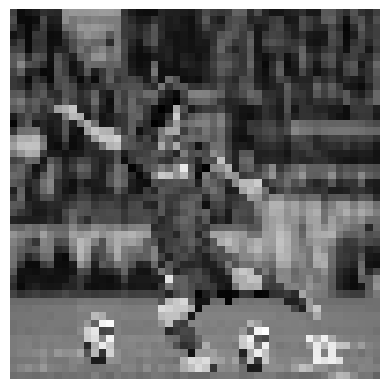

In [14]:
# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

## Cropping Images

In OpenCV, image cropping is performed by selecting specific rows and columns from the image matrix. This allows us to keep only the desired portion of the image. Cropping is beneficial when we want to focus on a specific area of interest in every image, such as in the case of stationary security camera footage.

For this task, we want to remove the outer portion of the image to change its dimensions.

Solution: The image is encoded as a two-dimensional NumPy array, so we can crop the image easily by slicing the array:

In [15]:
# Select first half of the columns and all rows [:,:128]
image_cropped = image[:,:128]

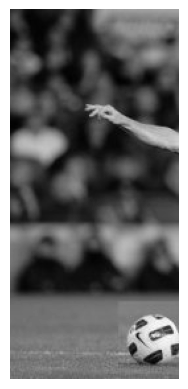

In [16]:
# Show image

plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

In [17]:
# Get the width (number of columns) and calculate the midpoint
height, width = image.shape
midpoint = width // 2
midpoint

225

In [18]:
# Slice the image: select all rows and first half of the columns
first_half = image[:, :midpoint]

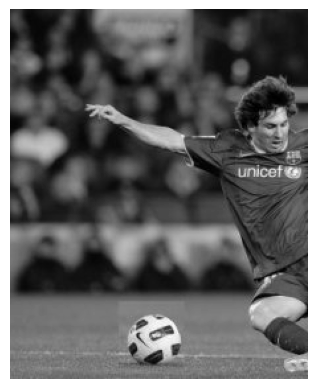

In [19]:
plt.imshow(first_half, cmap="gray"), plt.axis("off")
plt.show()

## Blurring Images
In this section your task is to smooth out an image.

To achieve image blurring, the average value of neighboring pixels is calculated and assigned to each pixel. This process involves using a mathematical representation called a kernel, which defines the neighboring pixels and the specific operation performed. The size of the kernel determines the extent of blurring, with larger kernels resulting in smoother images. In this example, we apply blurring by averaging the values within a 5 × 5 kernel surrounding each pixel.

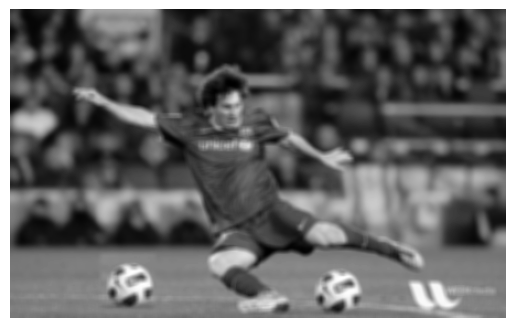

In [20]:
# Blur image 5 × 5 kernel surrounding each pixel
image_blurry = cv2.blur(image, (5,5))

# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

To highlight the effect of kernel size, here is the same blurring with a 100 × 100 kernel:

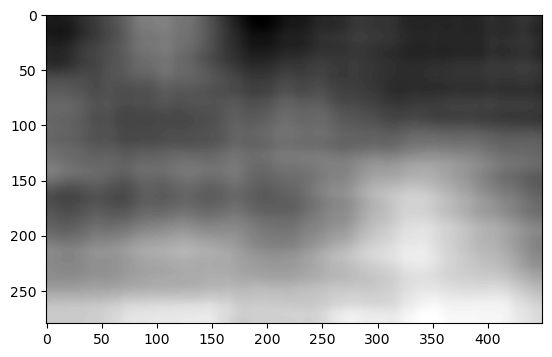

In [21]:
# Blur image 100 × 100 kernel
image_very_blurry = cv2.blur(image, (100,100))

# Show image
plt.imshow(image_very_blurry, cmap="gray")
plt.show()

## Sharpening Images
Sharpening operates in a similar manner to blurring, but with the intention of enhancing image details instead of reducing them. Instead of using a kernel to average neighboring values, a specialized kernel is created to emphasize the central pixel. This process enhances the contrast of edges, making them more pronounced in the image.

To perform the task of sharpening an image, create a kernel that highlights the target pixel. Then apply it to the image using fil ter2D:

In [22]:
# Create kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])


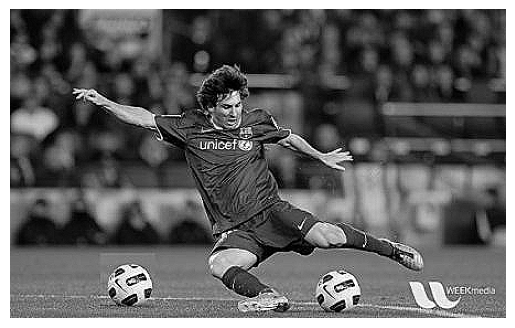

In [23]:
# sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

## Enhancing Contrast

Your task is to increase the contrast between pixels in an image.

Histogram equalization is an image processing technique that enhances the visibility of objects and shapes. When working with grayscale images, we can directly apply OpenCV's "equalizeHist" function to the image to achieve this effect.

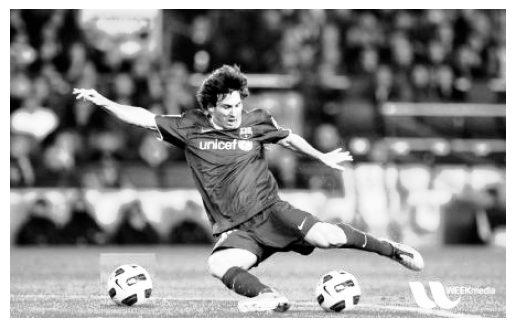

In [24]:
# Enhance image
image_enhanced = cv2.equalizeHist(image)

# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

In the case of a color image, it is necessary to convert the image to the YUV color format. The Y component represents the brightness or luma, while the U and V components represent the color information. Once the conversion is done, we can apply the equalizeHist function to the image and then convert it back to the BGR or RGB color format.

YUV is a color encoding system used in video processing and broadcasting. It separates the image information into luminance (brightness) and chrominance (color) components. The YUV format is often used because it allows more efficient compression, particularly useful in video and broadcasting, while maintaining good visual quality.

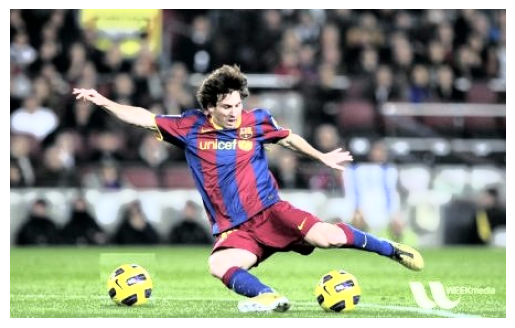

In [25]:
# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# Show image
plt.imshow(image_rgb, cmap="gray"), plt.axis("off")
plt.show()

## Isolating Colors

To isolate a color in an image, define a range of colors and then apply a mask to the image:

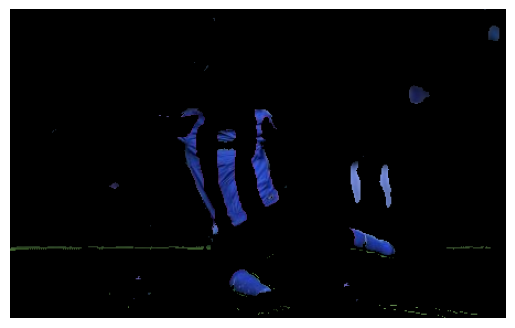

In [26]:
# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

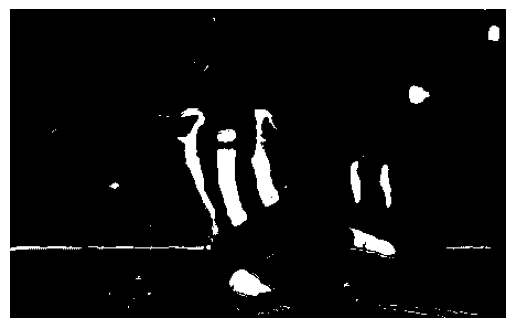

In [27]:
# we create a mask for the image (we will only keep the white areas):
# Show image
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

## Binarizing Images


Binarizing images in machine learning refers to the process of converting grayscale or color images into binary images, where each pixel is assigned either a black or white value. This is typically done by applying a thresholding technique.

Thresholding is a technique used to convert pixel intensities above a certain value to white and those below the value to black. Adaptive thresholding is a more advanced method where the threshold value for a pixel is determined based on the intensities of its neighboring pixels. This approach is particularly useful in situations where lighting conditions vary across different areas of an image.

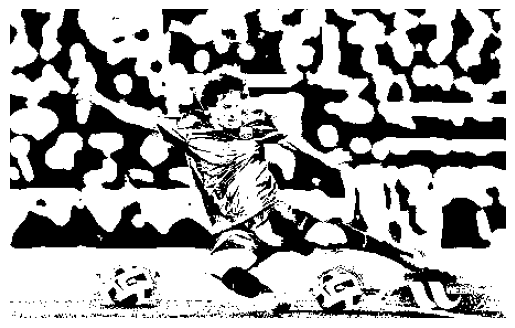

In [28]:
# Load image as grayscale
image_gray = cv2.imread('messi.jpg', cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_gray,
                                            max_output_value,
                                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY,

                                            neighborhood_size,
                                            subtract_from_mean)

# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

## Removing Backgrounds

In this part of the image handling problem your task is to isolate the foreground of an image.
To perfom this,  you need to mark a rectangle around the desired foreground, then run the GrabCut algorithm:

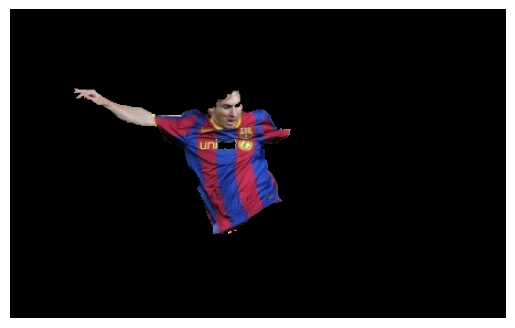

In [29]:
# Load image and convert to RGB
image_bgr = cv2.imread('messi.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150)

# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb,              # Our image
            mask,                   # The Mask
            rectangle,              # Our rectangle
            bgdModel,               # Temporary array for background
            fgdModel,               # Temporary array for background
            5,                      # Number of iterations
            cv2.GC_INIT_WITH_RECT)  # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

## Detecting Edges

Edge detection is a prominent area of focus in computer vision, aiming to identify boundaries between objects in an image. These boundaries, or edges, carry significant information as they represent areas of high contrast or changes in intensity. By detecting edges, we can distinguish important features from less informative regions, such as homogeneous backgrounds. Various techniques exist for edge detection, including Sobel filters and the Laplacian edge detector, each offering different approaches to highlight these informative boundaries.

In this part of the problem, we use an edge detection technique like the Canny edge detector to find the edges in an image:

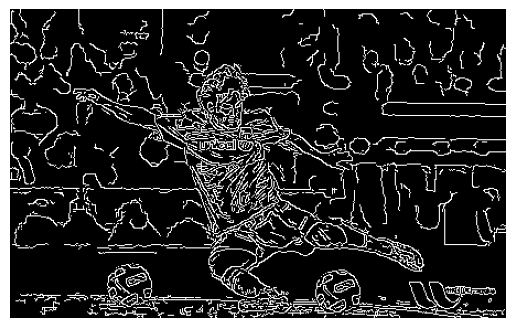

In [30]:

# Load image as grayscale
image_gray = cv2.imread('messi.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(image_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))


# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

## Detecting Corners

To detect the corners of an image, we use OpenCV’s implementation of the Harris corner detector, cornerHarris.

The Harris corner detector is a widely used technique for identifying corner points, which are regions of high information in an image. It operates by examining windows or patches of pixels and detecting significant changes in their content when the window is slightly moved. The cornerHarris function, used for this purpose, has three important parameters: `block_size` determines the size of the neighboring region for corner detection, `aperture` refers to the size of the Sobel kernel used, and a free parameter controls the sensitivity for detecting corners, with larger values indicating softer corners.

In [31]:

image_gray = cv2.imread('messi.jpg', cv2.IMREAD_GRAYSCALE)
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# Set corner detector parameters
block_size = 3

# Aperture parameter for the Sobel operator
aperture = 29
# A sensitivity parameter for corner detection (typically 0.04 to 0.06)
free_parameter = 0.04



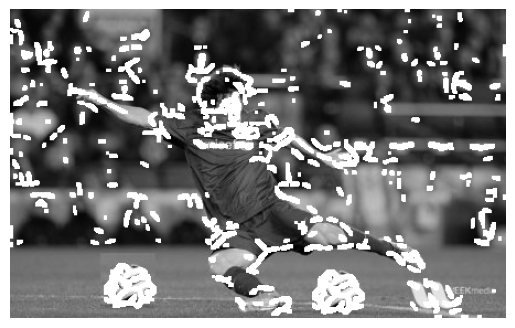

In [32]:
# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
                                          block_size,
                                          aperture,
                                          free_parameter)
# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white
threshold = 0.002
image_bgr[detector_responses >
              threshold *
              detector_responses.max()] = [255,255,255]

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

## Creating Features for Machine Learning

You want to convert an image into an observation for machine learning. To do so, use NumPy’s flatten to convert the multidimensional array containing an image’s data into a vector containing the observation’s values:

In [33]:
# Load image as grayscale
image_gray = cv2.imread('messi.jpg', cv2.IMREAD_GRAYSCALE)

# Resize image to 10 pixels by 10 pixels
image_10x10 = cv2.resize(image, (10, 10))

# Convert image data to one-dimensional vector
image_10x10.flatten()

array([  8, 105, 142,  35,  28,  48,  52,  39,  40,  89,  77,  59, 100,
        13,  17,  64,  98,  12,  61,  22,  78,  94,  41,  66,   2,  84,
        78,  81,  45,  52, 164,  72, 191,  45,  63,  85,  19,  38,  54,
        65,  53,  37,  27,   8, 140,  74,  66, 102,  99, 132,  42,  68,
        71,  72,  56,  47,  67, 138, 110, 162,  79,  48,  78, 114,  73,
        88, 161, 167, 134,  61,  24,  34,  18,  23,  86,  55, 163, 121,
       119,  22, 113, 116, 234, 119,  68, 125, 174, 122, 120, 117, 115,
       114,  27, 113, 107, 158, 180, 125, 219, 123], dtype=uint8)

**Discussion**

Images are presented as a grid of pixels. If an image is in grayscale, each pixel is pre‐ sented by one value (i.e., pixel intensity: 1 if white, 0 if black). For example, imagine we have a 10 × 10–pixel image:

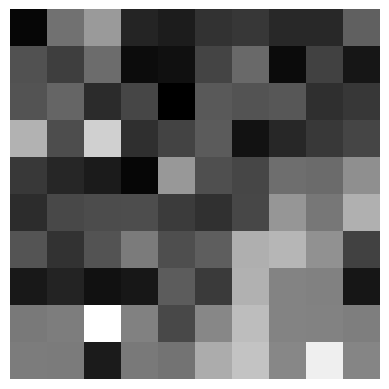

In [34]:

plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

In this case the dimensions of the images data will be 10 × 10:

In [35]:

image_10x10.shape

(10, 10)

And if we flatten the array, we get a vector of length 100 (10 multiplied by 10):

In [36]:

image_10x10.flatten().shape

(100,)

This is the feature data for our image that can be joined with the vectors from other images to create the data we will feed to our machine learning algorithms.

If the image is in color, instead of each pixel being represented by one value, it is rep‐ resented by multiple values (most often three) representing the channels (red, green, blue, etc.) that blend to make the final color of that pixel. For this reason, if our 10 × 10 image is in color, we will have 300 feature values for each observation:

In [37]:
# Load image in color
image_color = cv2.imread('messi.jpg')


# Resize image to 10 pixels by 10 pixels
image_color_10x10 = cv2.resize(image_color, (10, 10))

# Convert image data to one-dimensional vector, show dimensions
image_color_10x10.flatten().shape

(300,)

One of the major challenges of image processing and computer vision is that since every pixel location in a collection of images is a feature, as the images get larger, the number of features explodes

In [38]:
# Load image in grayscale
image_256x256_gray = cv2.imread('messi.jpg', cv2.IMREAD_GRAYSCALE)

# Convert image data to one-dimensional vector, show dimensions
image_256x256_gray.flatten().shape

(126000,)

And the number of features only intensifies when the image is in color:

In [39]:
# Load image in color
image_256x256_color = cv2.imread('messi.jpg')

# Convert image data to one-dimensional vector, show dimensions
image_256x256_color.flatten().shape

(378000,)

As demonstrated in the output, a compact color image already encompasses approximately 200,000 features. This can pose challenges during model training since the number of features may greatly surpass the number of observations available, leading to potential issues.